# Treating experimental data

<b>Authors:</b> Ayla S. Coder <a href="mailto:aylcoder@gmail.com">✉️</a> 

The Hylleraas Centre for Quantum Molecular Sciences and
The Centre for Computing in Science Education,
2022

--- 
### Things you might need to know before tackling this notebook
Before starting this part of the prelab for analytical chemistry II, the following notebooks should be completed: 

<ul>
  <li><a href="https://openworldlearning.github.io/docs/software/gpr/polynomial_regression.html">Notebook on polynomial regression </a></li>
  <li><a href="https://openworldlearning.github.io/docs/software/gpr/Covariance.html">Notebook on covariance</a></li>
    
  <li><a href="https://openworldlearning.github.io/docs/software/gpr/Kernels.html">Notebook on kernels</a></li>
  
  <li><a href="https://openworldlearning.github.io/docs/software/gpr/GPR_intro.html">Notebook on guassian process regression</a></li>
    <li><a href="https://openworldlearning.github.io/docs/software/gpr/quick_gpr_tutorial.html">Notebook on how to implement the guassian process regression module</a></li>
       <li><a href="https://openworldlearning.github.io/docs/software/gpr/quick_gpr_tutorial.html">Notebook on factorial design and boxbehnken DOE</a></li>
    
</ul>

The goal of this notebook is to introduce you to the implementation of the Guassian Process Regression Module in the context of a real life example of an analytical lab. The following lab results are from the Lab 4 assignment from last year that was based on a box behnken assignment. The same data from the boxbehnken Notebook will be used here to compare the two methods. 

# Answer these questions before the lab: 

### Q1: 
    a) From the previous box behnken exercise, what should the results from the GPR regressor show us? 
    b) Will we encounter an optimal respons, aka a maxima? Why/why not?

In [1]:
"""
Answer: 

"""

'\nAnswer: \n\n'

# 1: Let's get started
The btjeneste module is installed first: 

In [2]:
pip install btjenesten


The following command must be run outside of the IPython shell:

    $ pip install btjenesten

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


The necessary libraries are imported: 

In [3]:
import btjenesten as bt
import numpy as np
import matplotlib.pyplot as plt

# 2: Data Manipulation

The data from the boxbehnken analysis is formatted below. Pay attention to the shape. 

In [4]:
"""
All the data
"""
MgSO4 = np.array([30,   60,   90,   60,   30,   90,   30,   90,   60,   30,   90,   60,   60,   60,   60])
ACN   = np.array([0.75, 1.00, 1.00, 1.25, 0.75, 0.75, 1.25, 1.25, 0.75, 1.00, 1.00, 1.25, 1.00, 1.00, 1.00])
HCL   = np.array([6,    6,    6,    6,    12,   12,   12,   12,   18,   18,   18,   18,   12,   12,   12])
all_x = np.vstack([MgSO4, ACN, HCL]).T # The T transposes the stacked data into the correct shape.
# Try running this cell without the T to see what that means.

all_y = np.array([65626517, 48406988, 42143802, 26975625, 70941284, 66452677, \
26688204, 18157839, 73184566, 54919876, 9915204, 13288195, 17918550, 13380019, 19043787])


# The arrays containing all the data is printed below
print(all_x)
print("The shape of the all_x array is:", all_x.shape)
print("---")
print(all_y)
print ("The shape of the all_y array is: ", all_y.shape)

[[30.    0.75  6.  ]
 [60.    1.    6.  ]
 [90.    1.    6.  ]
 [60.    1.25  6.  ]
 [30.    0.75 12.  ]
 [90.    0.75 12.  ]
 [30.    1.25 12.  ]
 [90.    1.25 12.  ]
 [60.    0.75 18.  ]
 [30.    1.   18.  ]
 [90.    1.   18.  ]
 [60.    1.25 18.  ]
 [60.    1.   12.  ]
 [60.    1.   12.  ]
 [60.    1.   12.  ]]
The shape of the all_x array is: (15, 3)
---
[65626517 48406988 42143802 26975625 70941284 66452677 26688204 18157839
 73184566 54919876  9915204 13288195 17918550 13380019 19043787]
The shape of the all_y array is:  (15,)


As can be seen in the all_x array above, the last three measurements were performed on the exact same x-values. This is probelmatic for the gpr module, as the training data cannot have duplicates (the regressor cannot handle duplicates due to how it converges). In order to remove the redundancy, the following code is implemented:

In [5]:
# remove redundance
all_x_, all_y_ = bt.analysis.remove_redundancy(all_x, all_y) # note that these all_x_ and all_y_ arrays are different than the first ones. 

print ("The length of the x-array before removing the duplicates: ", len(all_x))
print("The length of the x-array after removing the duplicates: ", len(all_x_))

The length of the x-array before removing the duplicates:  15
The length of the x-array after removing the duplicates:  13


Note that this function takes the average of the responses from the duplicate measurements. This ensures that all responses are taken equally into account. If however, one response seems unreasonable, which statistical analysis can be performed to evaluate this?

# 3 Setting up the regressor: 
The next step is to set up the regressor as demonstrated in the Notebook: Quick tutorial on the Gaussian process regression module from btjenesten

In [18]:
n = np.random.choice(len(all_x_), 5, replace = False) # random indices to pick out training data. Change the 5 to change the amount of training data. 
# Here's an n that you can easily modify yourself: 
# n = np.array([index, index, index, index, index]) # Remember to not choose more than 13 indices. 

print("The indices of the picked out training data = ", n)

# Uses the indices n to pick out training data from the dataset for the GPR
training_x = all_x_[n]

training_y = all_y_[n]

print("The x-value training data picked out: ", training_x)
print("The y-value training data picked out: ", training_y)

# training the regressor with the picked out training data.
regressor = bt.gpr.Regressor(training_x , training_y)

# Optimizing the l-values for the regressor.
regressor.params = bt.analysis.parameter_optimization(all_x_, all_y_, training_fraction = 0.99)#*0.0001
#regressor.params[-2:] *= 0.001 #bt.analysis.parameter_optimization()

print("The l-parameters have been optimized to: ", regressor.params)

The indices of the picked out training data =  [ 1  3 10  6  5]
The x-value training data picked out:  [[60.    1.    6.  ]
 [60.    1.25  6.  ]
 [90.    1.   18.  ]
 [30.    1.25 12.  ]
 [90.    0.75 12.  ]]
The y-value training data picked out:  [48406988. 26975625.  9915204. 26688204. 66452677.]
      fun: 9.858371400632964e-17
 hess_inv: array([[ 9.99997530e-01,  2.61168747e-06, -1.58157621e-03],
       [ 2.61168747e-06,  1.00001556e+00, -1.75534359e-03],
       [-1.58157621e-03, -1.75534359e-03,  6.28830395e-01]])
      jac: array([-4.14695902e-11,  3.09275635e-12, -5.86031645e-09])
  message: 'Optimization terminated successfully.'
     nfev: 35
      nit: 4
     njev: 7
   status: 0
  success: True
        x: array([-1.99955557, -2.0025495 , -1.32654964])
The l-parameters have been optimized to:  [0.01001024 0.00994147 0.0471466 ]


The regressor has now been trained on a random set of 5 values from the training datasets. The next step is to visualize how well the regresor is able to predict the respons in all the points already measured: 

In [19]:
# Uses all the x data to predict the corresponding y-values with the regressor.
y_pred = regressor.predict(all_x_) # This will be compared to the measured values.

print("The predicted responses: ", y_pred)
print("___")
print("The actual responses: ", all_y_)

The predicted responses:  [4.88506979e+06 4.84069880e+07 1.22463712e+07 2.69756250e+07
 2.66229160e+07 6.64526770e+07 2.66882040e+07 6.62857107e+07
 8.03457282e+04 4.88564610e+06 9.91520400e+06 3.21789741e+04
 8.87826539e+06]
___
The actual responses:  [65626517.         48406988.         42143802.         26975625.
 70941284.         66452677.         26688204.         18157839.
 73184566.         54919876.          9915204.         13288195.
 16780785.33333333]


# Figure 1:

This next figure plots the response against the samples in the order they were analyzed in. The point of this figure is to see how close the regressor was able to match reality. (This depends on the adjusted l-parameters, which is outside of the scope for this course.) 

The closer the predicted response is to the blue margin of error, the more optimal the l parameters are for this data specifically.

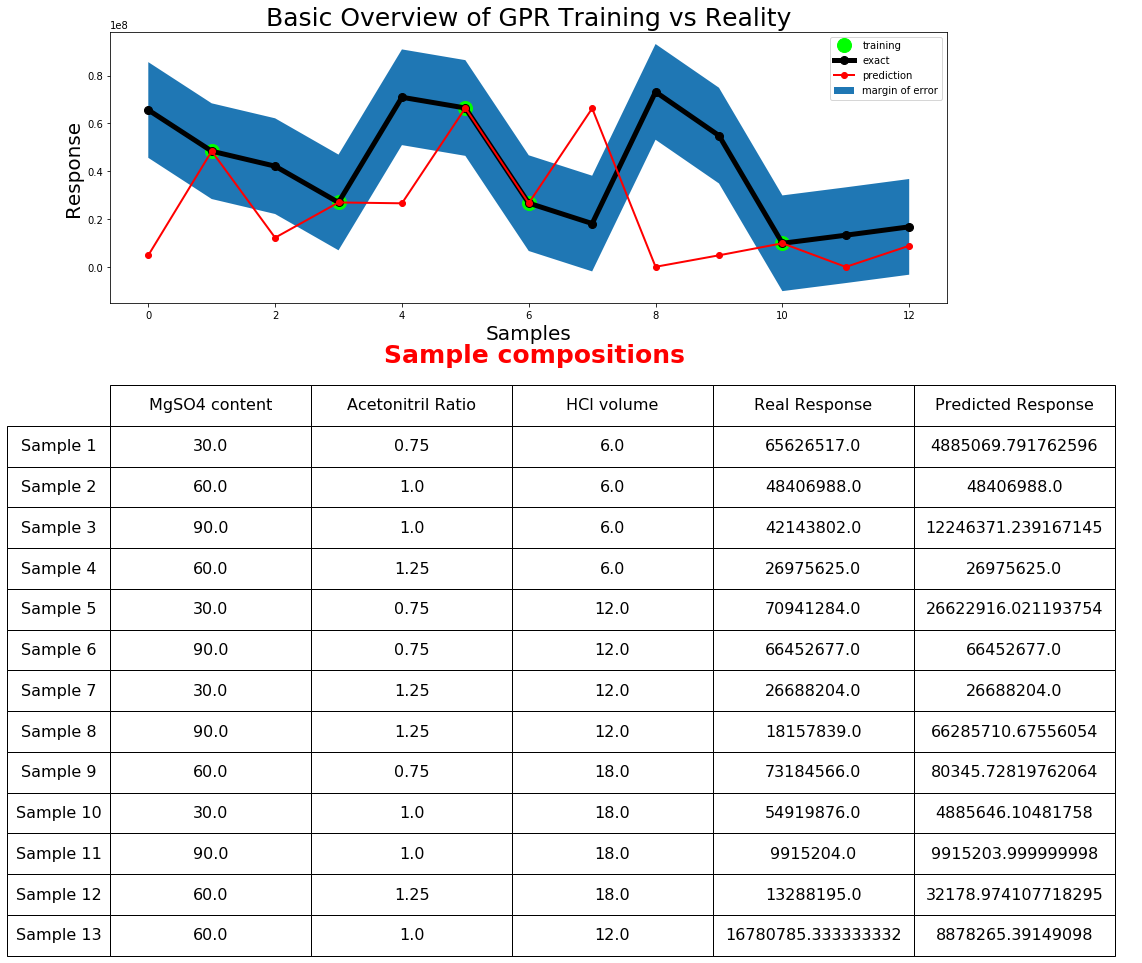

In [20]:
# Figure where the response is plottet against the samples. Figure 1
plt.figure(figsize = (15,5))
plt.title("Basic Overview of GPR Training vs Reality", fontsize = "25")

plt.plot(n, training_y, "o", color = (0,1,0), markersize = 14, label ="training")
plt.plot(all_y_ , "o-", color = (0,0,0), label = "exact", markersize = 8, linewidth = 5)
plt.plot(y_pred, "o-", color = (1.0,0,0), label = "prediction", linewidth = 2)

plt.fill_between(np.arange(len(all_y_)), all_y_ - 2e7, all_y_ + 2e7, label = "margin of error", zorder = -10)

plt.xlabel("Samples", fontsize = "20")
plt.ylabel("Response", fontsize = "20")

plt.legend()

# # # to add a table to Figure 1:
columns = ("MgSO4 content", "Acetonitril Ratio", "HCl volume", "Real Response", "Predicted Response")
rows = ['Sample %d' % x for x in np.arange(1, len(all_y_)+1, 1)]

n_rows = len(all_y_)
plt.text(len(all_x_)/3.5, -4e7, "Sample compositions", fontsize = 25, fontweight='bold', color="red")


# Reshaping (stacking) data for the table
x = all_x_.T
stacked = np.vstack([x, all_y_, y_pred]).T

# Add a table at the bottom of the axes
the_table = plt.table(cellText= stacked,
                      cellLoc='center',
                      rowLoc='center',
                      rowLabels=rows,
                      colLabels=columns,
                      bbox=[0.0, -2.4, 1.2,2.1]) # table.scale doesn't work with bbox 

the_table.auto_set_font_size(False)
the_table.set_fontsize(16)

plt.show()

Before answering the questions below, try running the code a few more times from part 3, where the regressor was set up. What does this do? Pay attention to the output from the print statements in that first cell (aka the training data). 

### Q2: 
Discuss the Figure above: 

    a) What does it show us? 
    
    b) Is the order of the samples of any real significance (ie, does rearranging them change the graph)?
    
    c) Is this a good visualization of any maxima with regards to the variables/factors/dimensions (these are all 
    the same thing, what their called depends on whether or not you are working with a factorial design, a 
    GPR regression or neither)?
    
    d) How does changing the training data change the predicted response? 
    
    e) How would you improve the predicted response?


In [21]:
"""
Answer: 

"""

'\nAnswer: \n\n'

# Figure 2: 
This Figure is perhaps more useful. Here each dimension is plotted against the response one at a time. 

In [22]:
# This function plots all the dimensions chosen in rows of three in the same figure. 
# That way it can be used to visualize experiments where the analysis involves more than three dimensions. 

def one_dimensional_plots(x_data, proposed_new_x, reg, y_labels, x_labels):
    # Where y_labels and x_labels are arrays of strings 
    
    plt.figure(figsize=(15, 7)) # Sets the figure size
    
    rows = int(len(x_data[0])/3) # The amount of rows of plots in the figure
    
    dimensions = len(x_data[0]) # The amount of dimensions evaluated.
    
    # For loop to set up each subplot
    for i in range (dimensions):
        
        # This function is documented on Btjeneste website. If you're curious, run the command help(bt.analysis.data_projection)
        x,y = bt.analysis.data_projection(reg, axes = [i], center = proposed_new_x, resolution = 100)
        
        # Sets up the i-th subplot
        ax = plt.subplot(rows, dimensions, i+1)
    
        ax.set_ylabel(y_labels[i], fontsize = 15)
        ax.set_xlabel(x_labels[i], fontsize = 15)
        ax.grid()
       # What is plotted in each plot:
        ax.plot(x[0], y)
        
    plt.show()
    

The acquisition function acquires a point in which the proposed maxima from the regressor (predicted response), is predicted to be. This point is printed out below with it's corresponding predicted response: 

In [23]:
new_x = regressor.aquisition(method = "COBYLA", minimize_prediction=False, l = 0) # acquiring the x-coordinates for the regressor's maxima.

print("The dimensions for the next suggested measurement: ", new_x[0])
print("The new measurement's predicted output (the maxima of the regressor): ", regressor.predict(new_x)[0])


The dimensions for the next suggested measurement:  [89.9993694   0.74694843 11.96224585]
The new measurement's predicted output (the maxima of the regressor):  66457257.13158311


### NB!

Depending on the training data picked out, the new proposed measurement might contain negative values. Is this possible for any of the dimensions in this analysis? Or does it violate any constraints for the experiment? Is there any situation (theoretically) where a dimension can be negative? 

In [24]:
"""
Answer:
"""

'\nAnswer:\n'

In order to fix the issue of negative values occuring for our dimension's  proposed maxima, the folowing line of code is implemented:

The realistic dimensions for the next suggested measurement:  [89.9993694   0.74694843 11.96224585]


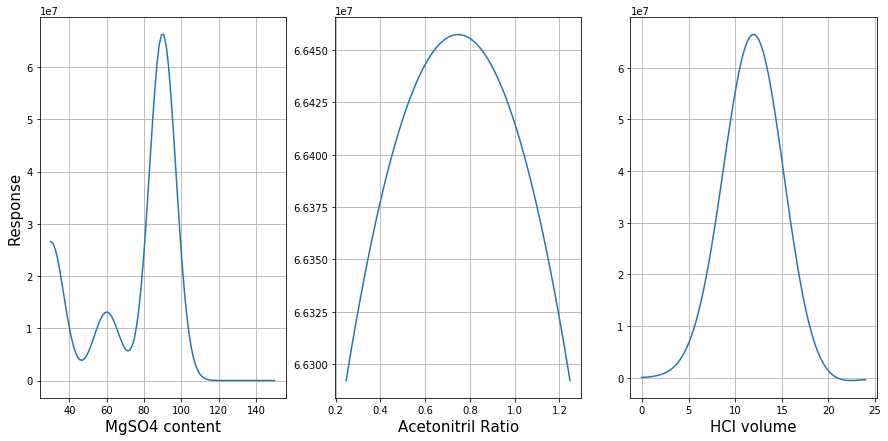

In [25]:
# constrain proposed values to larger than 0
new_x_ = np.max(np.stack([new_x[0],np.zeros(3, dtype = float)]), axis = 0)

print("The realistic dimensions for the next suggested measurement: ", new_x_)

plots = one_dimensional_plots(all_x_, new_x_, regressor, ["Response", "", ""], columns) # setting up the plots with our data.
plots # Calling the plotting function. 


### Q3

    a) Discuss what these plots show us. 
    
    b) How do these Figures change when the training data in part 3 changes? What does this show us? 

    c) How reliable are these figures when it comes to determining what the optimal dimensions are? 

    d) How do these two figures compare? 

In [26]:
"""
Answer
"""

'\nAnswer\n'

# Figure 3
2d plots of different dimensions against eachother that are equivalent to the 3d rotable graphs in box behnken. 

5


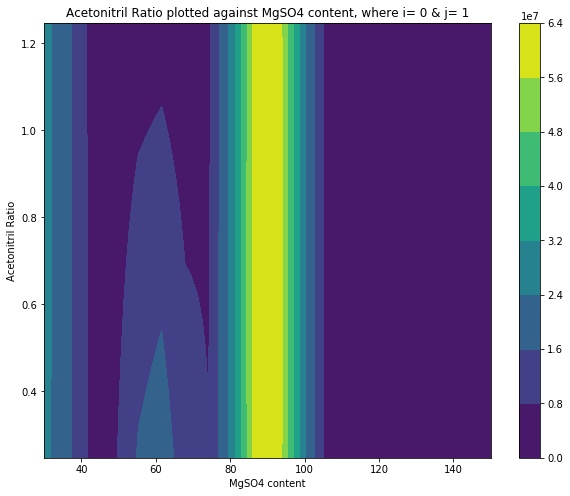

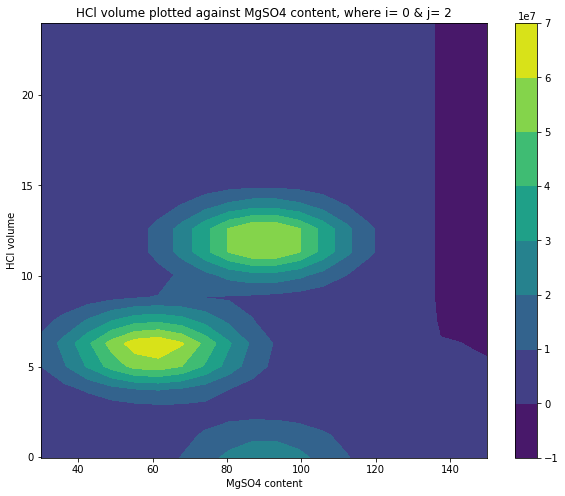

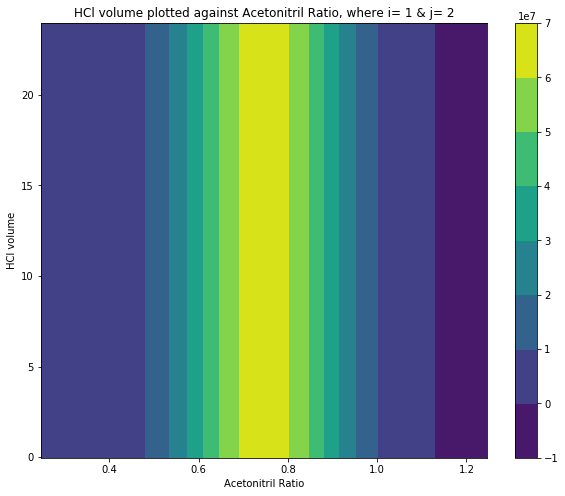

In [27]:
S = columns[:3]
print(len(columns))

for i in range(3):
    for j in range(i+1, 3):

        x,y = bt.analysis.data_projection(regressor, axes = [i,j], center = new_x_)#np.array([new_measurements[-1]]))
        
        plt.figure(figsize =(10,8))
        plt.title(f"{S[j]} plotted against {S[i]}, where i= {i} & j= {j}")
        plt.xlabel(S[i])
        plt.ylabel(S[j])
        plt.contourf(x[0], x[1], y)
        plt.colorbar()
        plt.show()


### A few follow-up questions, Q4: 

    1. Starting point:  
        a) what is a good starting point, and or which initial measurements should we take? 
        
        b) How can we find this out? 
        
        c) Why can’t the computer tell us where to start? 
        
        d) What happens when a non optimal starting point is chosen? 
        
        e) What would happen if the entire dataset above was used as training data? try by setting 
        n = np.arange(0, len(all_x_)). 
    
    2. What determines the minimal amount of starting measurements? Think: what would the regressor look like if 
    one starting measurement was used vs two vs three? 


    3. Discuss: why do we need more than one measurement in each dimension? 



    4. a few sentences about regression.  

In [28]:
"""
Answers: 

"""

'\nAnswers: \n\n'

# Before lab: 

Okay, now that we have completed this module, propose where our initial measurements should be in the lab 4. 

    -> Which levels should each dimension have in your opinion? 
    
    -> Can this information from last year's box behnken excercise be used as a starting point (training data) for 
    the new regressor? Why/why not? Hint: Remember why taking measurements over several days is often not 
    recommended. 
    
    -> What is the desired amount of measurements that should be necessary to find the maxima?
    
> **Extra:** How would you set up this experiment? Think about time constraints, how errors can propagate (how to fix that), load on the user and how to store your analyte solutions.